In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading loan file
ln=pd.read_csv("loan.csv")
print ("Sample records: \n")
ln.head(2)

Sample records: 



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print("Loan Data - Row vs columns: ", ln.shape)


Loan Data - Row vs columns:  (39717, 111)


 # Section 1: Data Cleaning
## 1.1 Clean all rows which are null

In [4]:
#function defined to provide detailed info on any column list when called for

def detinfo(df,list):
    for i in list:
        print("*******************************************************")
        print("column Name: ", i)
        print("-------------------------------------------------------")
        print("type: ", df[i].dtype)
        print("Number of null values: ", df[i].isnull().sum() )
        print("Number of unique values:",len(df[i].unique()) )
        print("Detailed Information")
        print(df[i].describe())


In [5]:
#function defined to delete columns when required

def delfunc(df,list):
    print("No. of columns to be deleted: ", len(list))
    print("Columns to be deleted: ", list)
    print("Total Columns before deletion: ", len(ln.columns))
    df.drop(list,axis=1,inplace=True)
    print("Total Columns after deletion: ", len(ln.columns))



In [6]:
#check percentage of column values are null
#ln[100*ln.isnull().mean().value==100]
chk_null=round(100*ln.isnull().mean(),0).sort_values(ascending=False)
round(100*ln.isnull().mean(),0).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
pub_rec                        0.0
open_acc                       0.0
chargeoff_within_12_mths       0.0
delinq_amnt                    0.0
id                             0.0
Length: 111, dtype: float64

######### Above shows that there are columns which have all rows as null or most rows null

In [7]:
##### Identifing all such columns and deleting them
list1=[]
for i in range(0,len(chk_null)):
    if chk_null.iloc[i]>=93.0:
        list1=np.append(list1,chk_null.index[i])

delfunc(ln,list1)
     

No. of columns to be deleted:  56
Columns to be deleted:  ['verification_status_joint' 'annual_inc_joint' 'mo_sin_old_rev_tl_op'
 'mo_sin_old_il_acct' 'bc_util' 'bc_open_to_buy' 'avg_cur_bal'
 'acc_open_past_24mths' 'inq_last_12m' 'total_cu_tl' 'inq_fi'
 'total_rev_hi_lim' 'all_util' 'max_bal_bc' 'open_rv_24m' 'open_rv_12m'
 'il_util' 'total_bal_il' 'mths_since_rcnt_il' 'open_il_24m' 'open_il_12m'
 'open_il_6m' 'open_acc_6m' 'tot_cur_bal' 'tot_coll_amt'
 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl' 'mort_acc' 'num_rev_tl_bal_gt_0'
 'total_bc_limit' 'total_bal_ex_mort' 'tot_hi_cred_lim' 'percent_bc_gt_75'
 'pct_tl_nvr_dlq' 'num_tl_op_past_12m' 'num_tl_90g_dpd_24m' 'num_tl_30dpd'
 'num_tl_120dpd_2m' 'num_sats' 'num_rev_accts' 'mths_since_recent_bc'
 'num_op_rev_tl' 'num_il_tl' 'num_bc_tl' 'num_bc_sats' 'num_actv_rev_tl'
 'num_actv_bc_tl' 'num_accts_ever_120_pd' 'mths_since_recent_revol_delinq'
 'mths_since_recent_inq' 'mths_since_recent_bc_dlq' 'dti_joint'
 'total_il_high_credit_limit' 'mths

In [8]:
round(100*ln.isnull().mean(),0).sort_values(ascending=False)

mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
total_rec_late_fee             0.0
revol_bal                      0.0
revol_util                     0.0
total_acc                      0.0
initial_list_status            0.0
out_prncp                      0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
total_rec_int                  0.0
id                             0.0
recoveries                     0.0
pub_rec                        0.0
last_pymnt_d                   0.0
last_pymnt_amnt                0.0
last_credit_pull_d             0.0
collections_12_mths_ex_med     0.0
policy_code                    0.0
application_type               0.0
acc_now_delinq                 0.0
chargeoff_within_12_mths       0.0
delinq_amnt                    0.0
collection_recovery_

In [9]:
# deleting columns which are not useful for analysis for customer default drivers
cols=['url','desc','emp_title','zip_code']
delfunc(ln,cols)

No. of columns to be deleted:  4
Columns to be deleted:  ['url', 'desc', 'emp_title', 'zip_code']
Total Columns before deletion:  55
Total Columns after deletion:  51


In [10]:
# analysing rest of the columns for cleaning and usefullness of the data
detinfo(ln,ln.columns)


*******************************************************
column Name:  id
-------------------------------------------------------
type:  int64
Number of null values:  0
Number of unique values: 39717
Detailed Information
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
*******************************************************
column Name:  member_id
-------------------------------------------------------
type:  int64
Number of null values:  0
Number of unique values: 39717
Detailed Information
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
*******************************************************
column Name:  loan_amnt
-------------------------------------------------------
type:  i

In [11]:
# deleting columns because columns values are same and hence not useful for analysis
cols=['title','pub_rec', 'initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
delfunc(ln,cols)

No. of columns to be deleted:  12
Columns to be deleted:  ['title', 'pub_rec', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
Total Columns before deletion:  51
Total Columns after deletion:  39


In [12]:
#remove current loan status records as they are not relevant for the analysis
ln1=ln
ln=ln[ln['loan_status']!='Current']
#detinfo(ln,['loan_status'])
#create numerical representation for loan_status
#0-Fully Paid, 1-Charged Off
ln['Defaulted']=np.where(ln['loan_status']=='Fully Paid',0,1)

In [13]:
##Convert columns to categorical columns
ln['loan_amount'] = pd.cut(x=ln['loan_amnt'], bins=[0, 10000, 20000, 30000, 40000], labels=['0-10K', '10K-20K', '20K-30K','30K-40K'])

ln['annual_income'] = pd.cut(x=ln['annual_inc'], bins=[0,20000, 40000, 60000, 80000,7000000], labels=['0-20K', '20K-40K', '40K-60K','60K-80K','>80K'])

##Create numerical column loan amount to annual income ratio
ln['lta']=ln['loan_amnt']/ln['annual_inc']

In [14]:
#convert term to integer by removing 'months' from value
ln['term'] = ln['term'].str.replace(' months', '').astype(int)
#convert interest rate to numerical by removing %
ln['int_rate'] = ln['int_rate'].str.replace('%', '').astype(float)

In [15]:
num_cols=['int_rate','term','installment','dti','open_acc','revol_bal','total_rec_prncp','total_rec_int','total_rec_late_fee','delinq_2yrs','mths_since_last_delinq','Defaulted','loan_amnt','annual_inc','lta']
cat_cols=['grade','sub_grade','purpose','home_ownership','verification_status','issue_d','loan_status','addr_state','pub_rec_bankruptcies','loan_amount','annual_income']
extra_cols=['id','member_id','pymnt_plan','emp_length','revol_util','total_acc','total_pymnt','total_pymnt_inv','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

-------------------------- int_rate ----------------------------


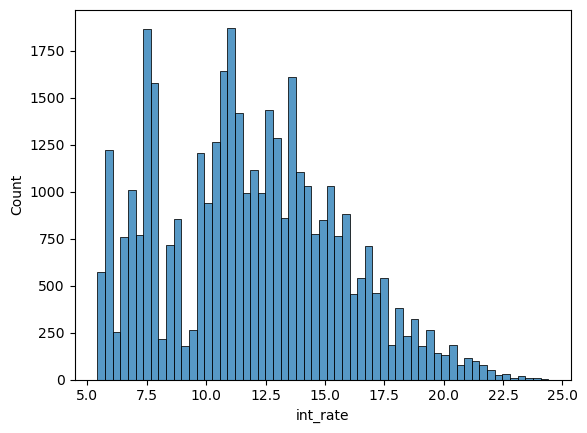

-------------------------- term ----------------------------


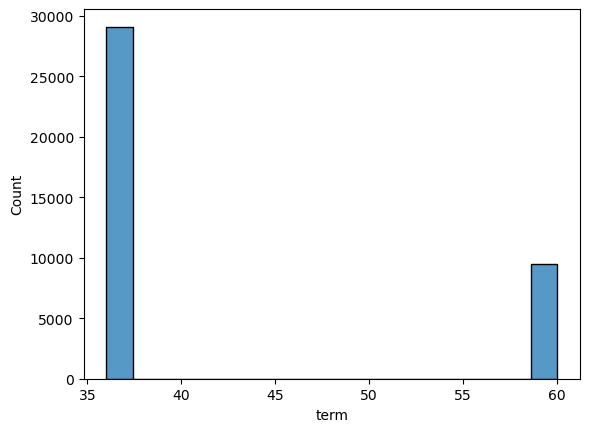

-------------------------- installment ----------------------------


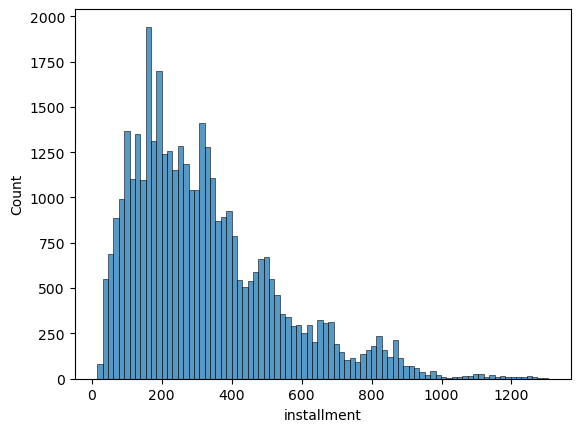

-------------------------- dti ----------------------------


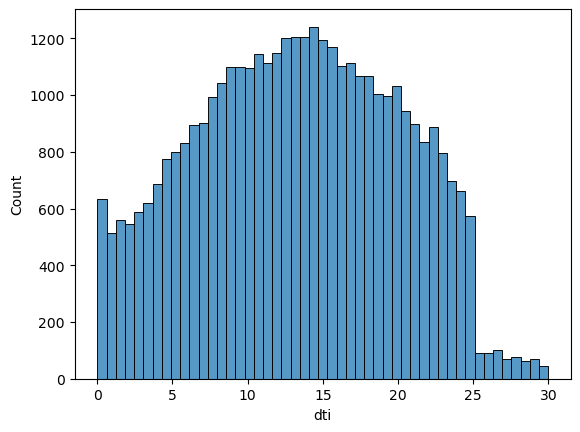

-------------------------- open_acc ----------------------------


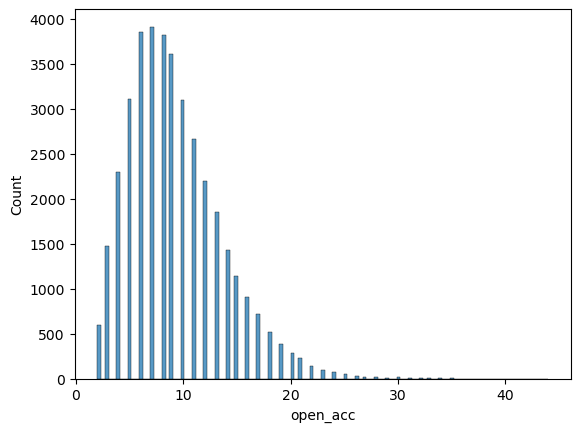

-------------------------- revol_bal ----------------------------


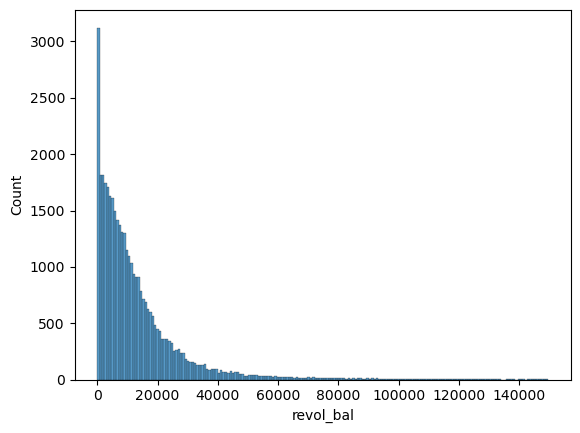

-------------------------- total_rec_prncp ----------------------------


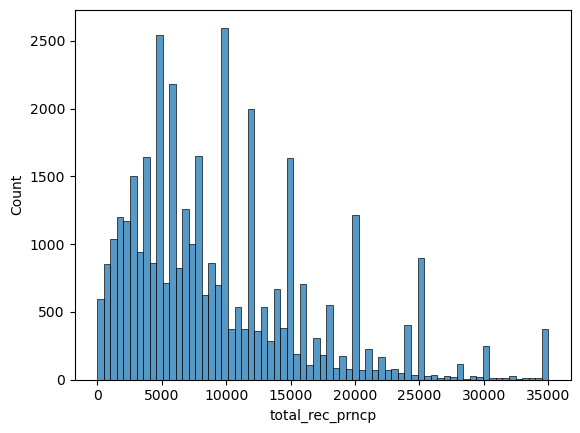

-------------------------- total_rec_int ----------------------------


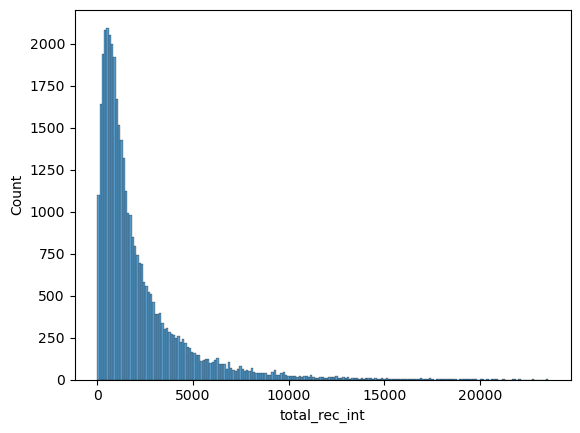

-------------------------- total_rec_late_fee ----------------------------


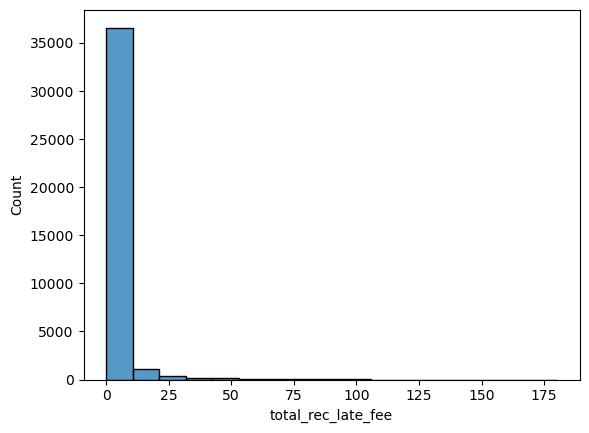

-------------------------- delinq_2yrs ----------------------------


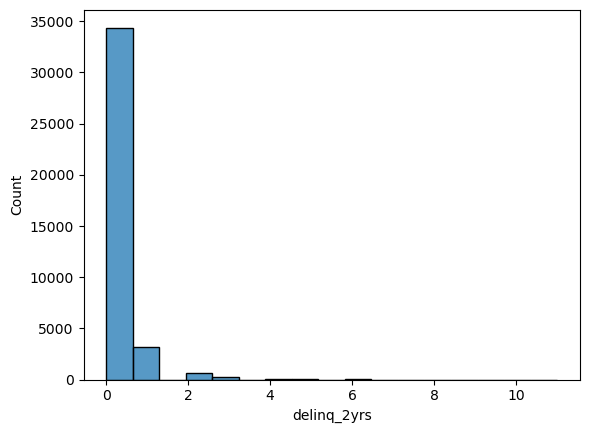

-------------------------- mths_since_last_delinq ----------------------------


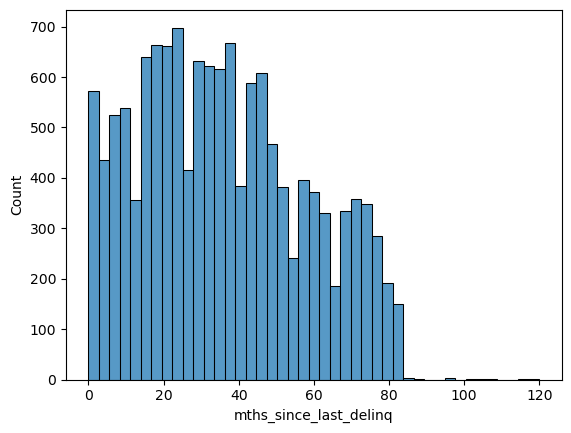

-------------------------- Defaulted ----------------------------


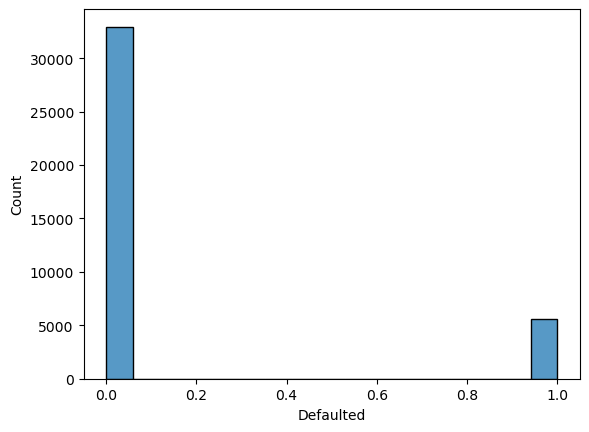

-------------------------- loan_amnt ----------------------------


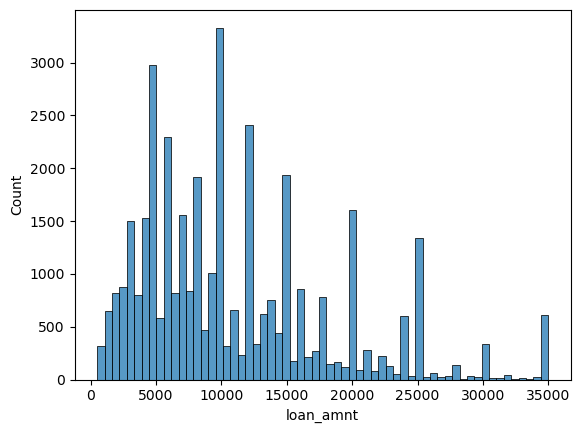

-------------------------- annual_inc ----------------------------


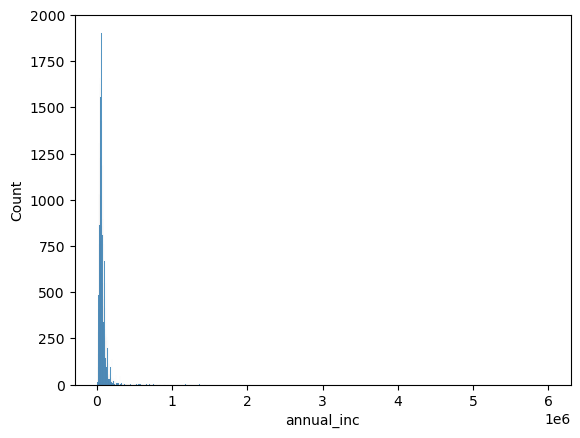

-------------------------- lta ----------------------------


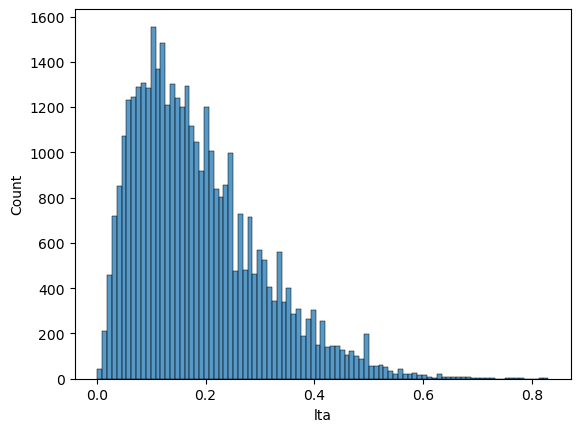

In [16]:
#NUM COL univariate analysis
for i in num_cols:
    print('--------------------------',i,'----------------------------')
    sns.histplot(ln[i])
    pt.show()

-------------------------- int_rate ----------------------------


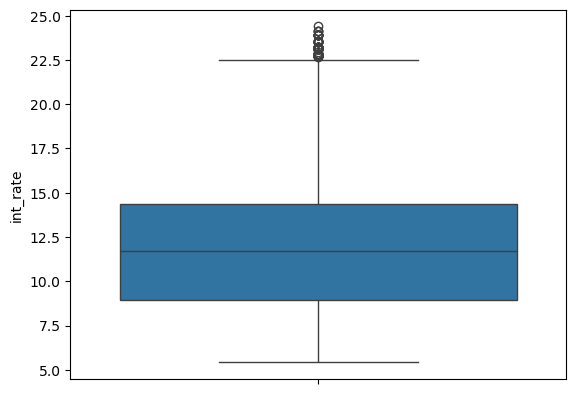

-------------------------- term ----------------------------


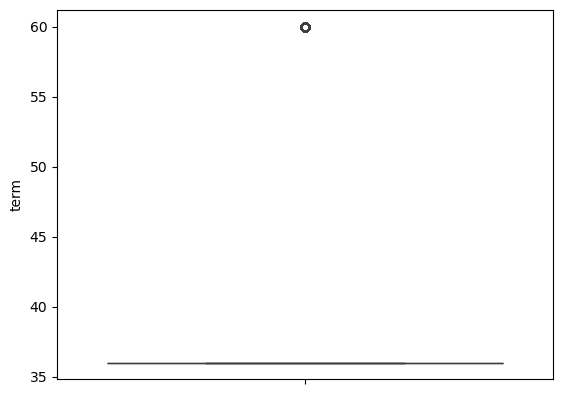

-------------------------- installment ----------------------------


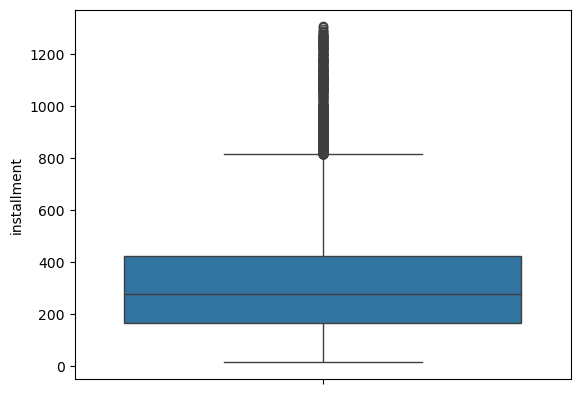

-------------------------- dti ----------------------------


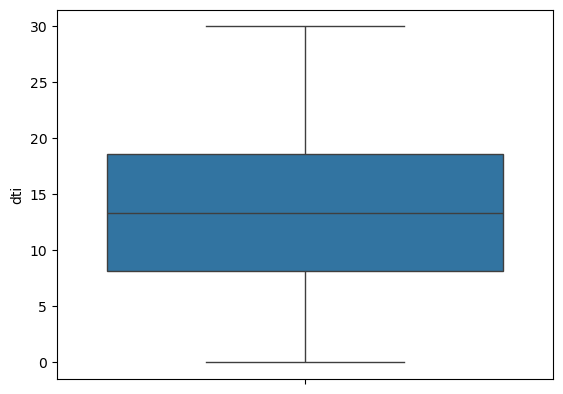

-------------------------- open_acc ----------------------------


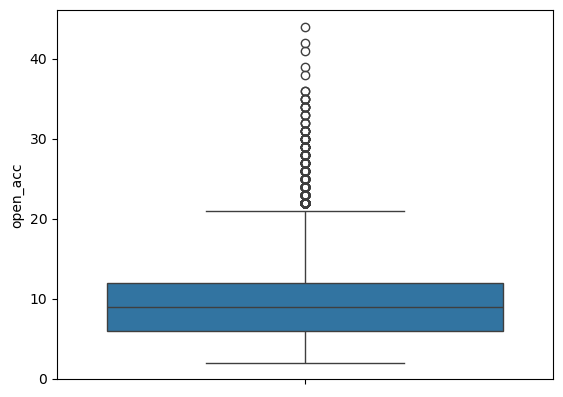

-------------------------- revol_bal ----------------------------


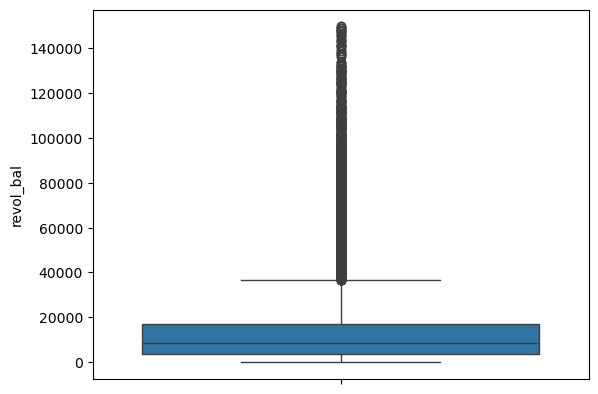

-------------------------- total_rec_prncp ----------------------------


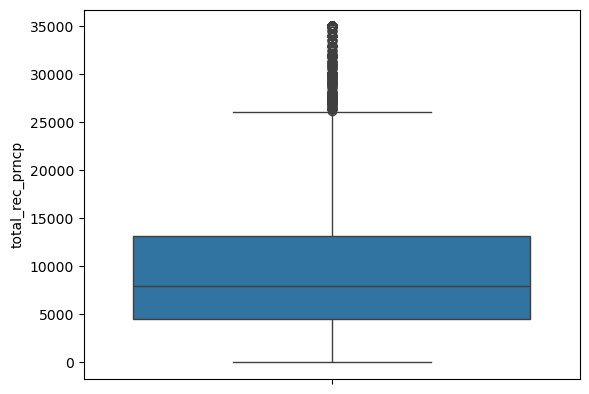

-------------------------- total_rec_int ----------------------------


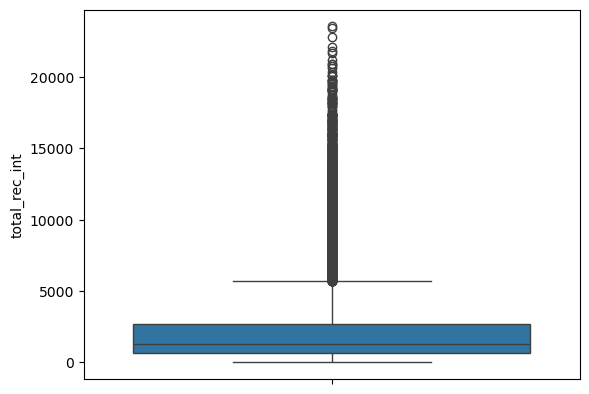

-------------------------- total_rec_late_fee ----------------------------


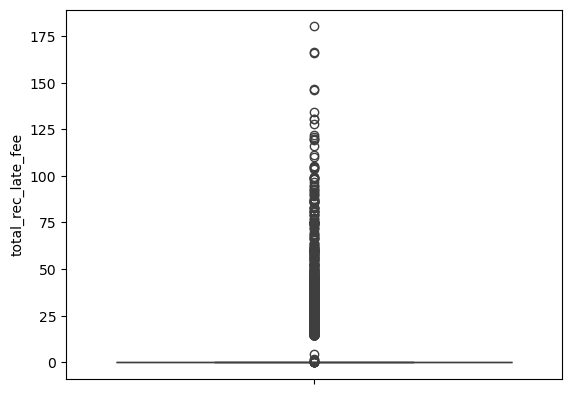

-------------------------- delinq_2yrs ----------------------------


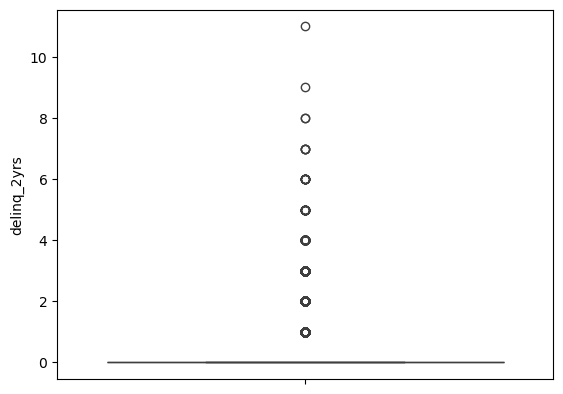

-------------------------- mths_since_last_delinq ----------------------------


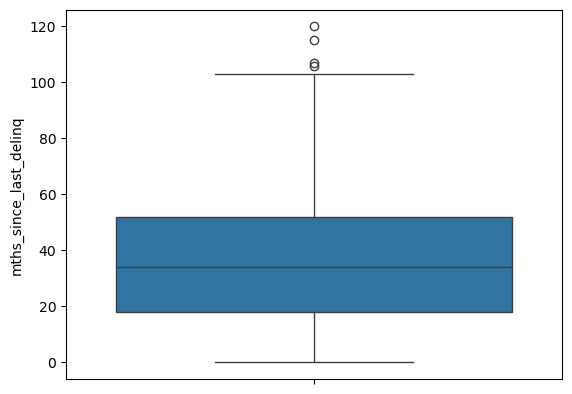

-------------------------- Defaulted ----------------------------


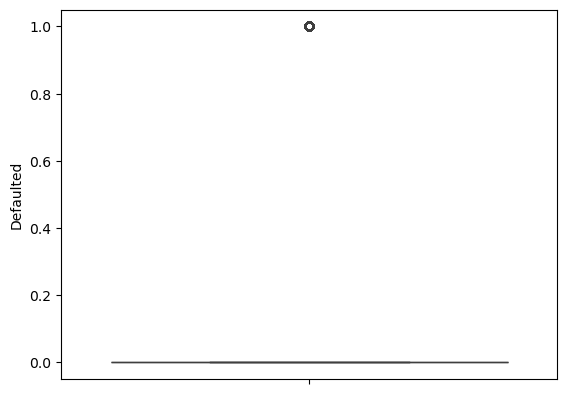

-------------------------- loan_amnt ----------------------------


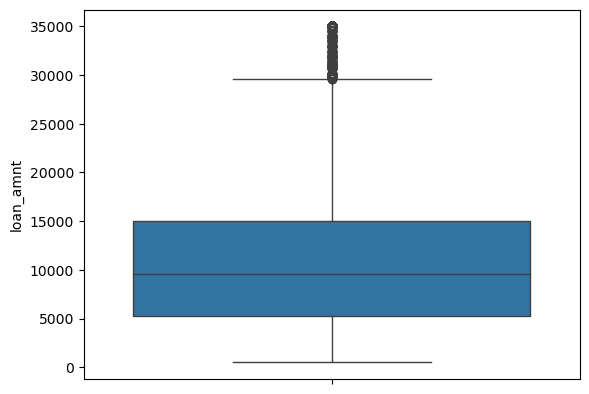

-------------------------- annual_inc ----------------------------


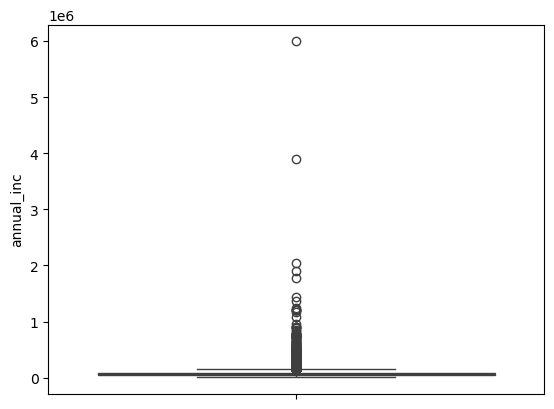

-------------------------- lta ----------------------------


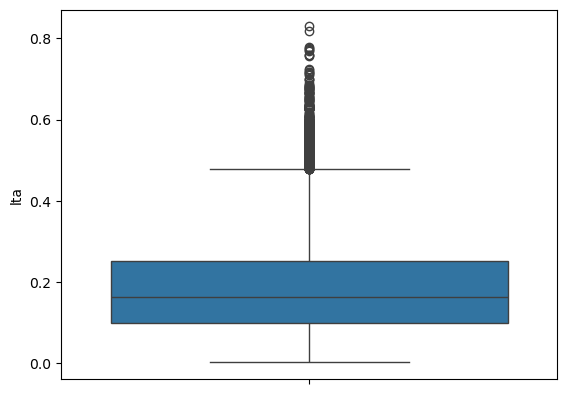

In [17]:
for i in num_cols:
    print('--------------------------',i,'----------------------------')
    sns.boxplot(ln[i])
    pt.show()

-------------------------- int_rate ----------------------------


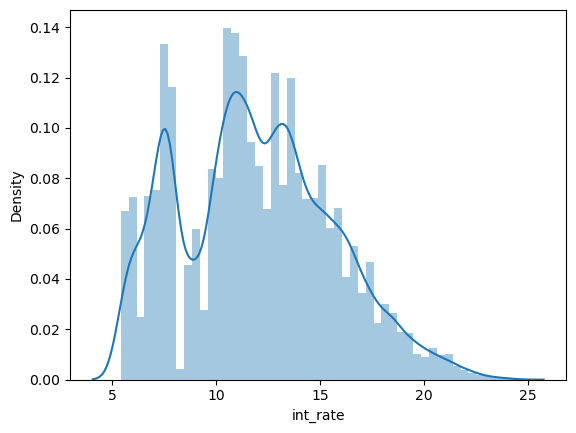

-------------------------- term ----------------------------


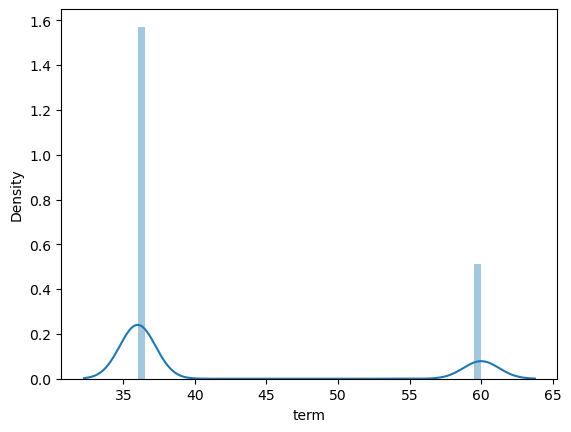

-------------------------- installment ----------------------------


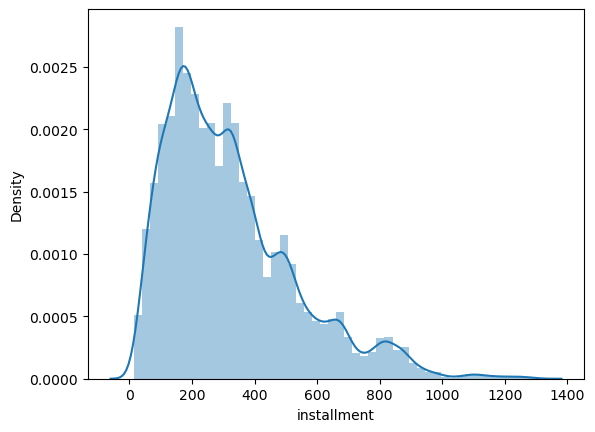

-------------------------- dti ----------------------------


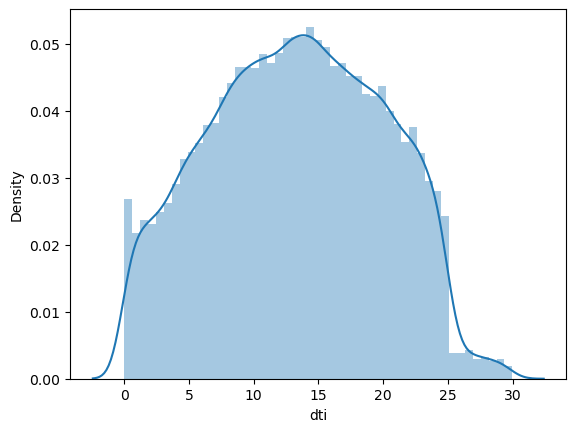

-------------------------- open_acc ----------------------------


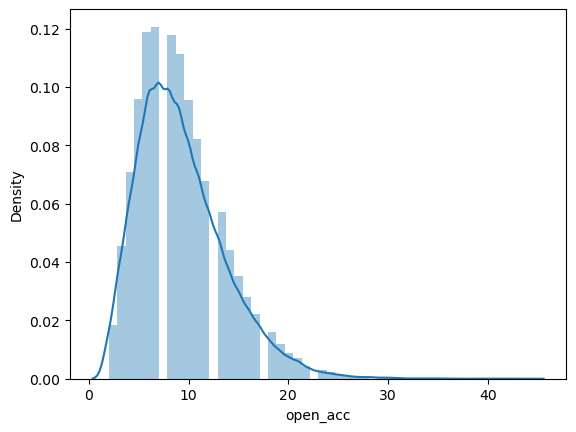

-------------------------- revol_bal ----------------------------


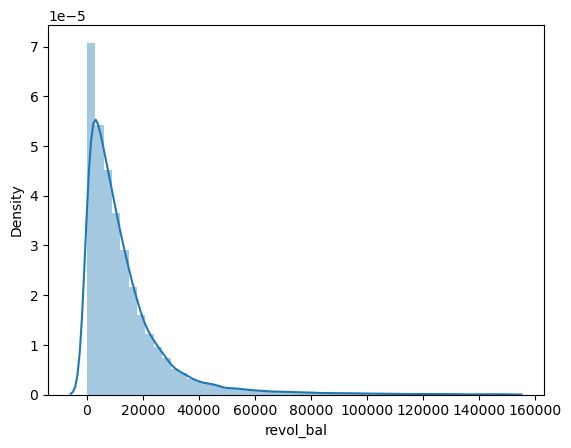

-------------------------- total_rec_prncp ----------------------------


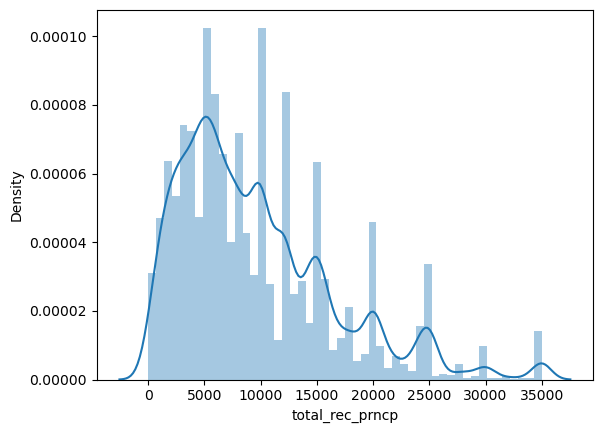

-------------------------- total_rec_int ----------------------------


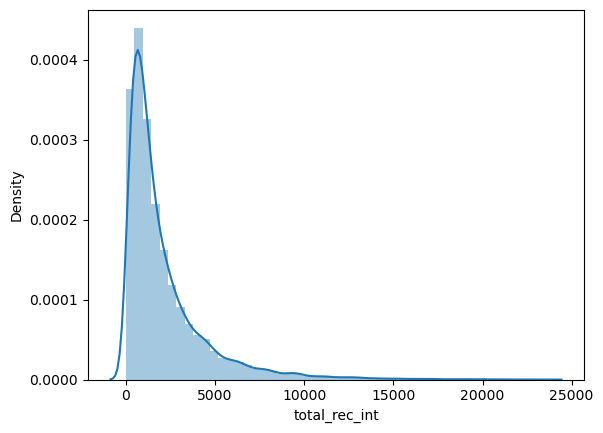

-------------------------- total_rec_late_fee ----------------------------


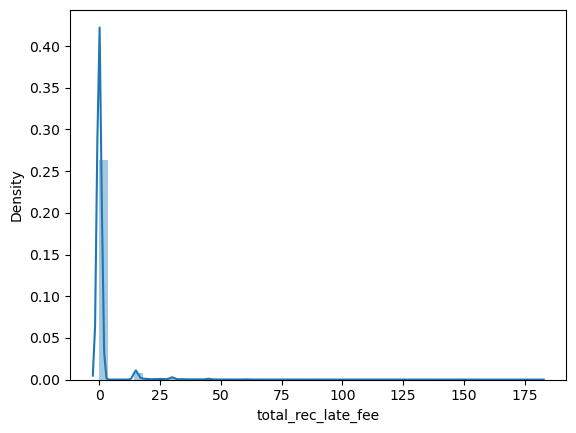

-------------------------- delinq_2yrs ----------------------------


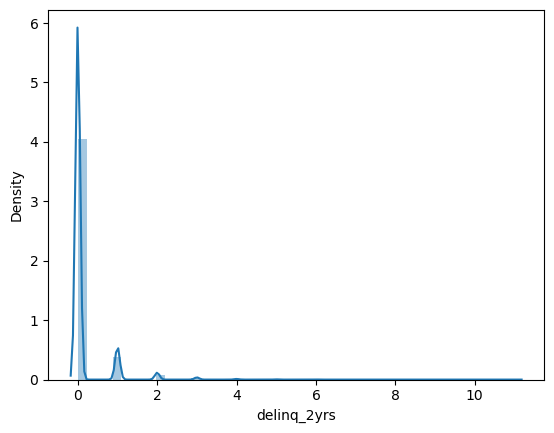

-------------------------- mths_since_last_delinq ----------------------------


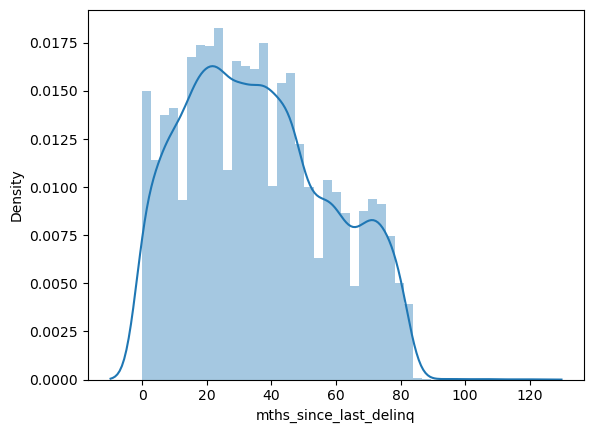

-------------------------- Defaulted ----------------------------


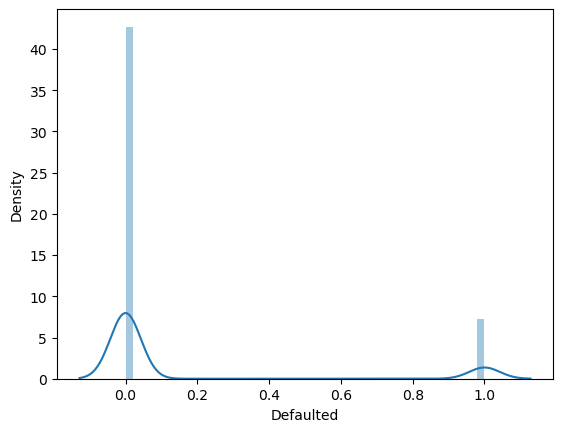

-------------------------- loan_amnt ----------------------------


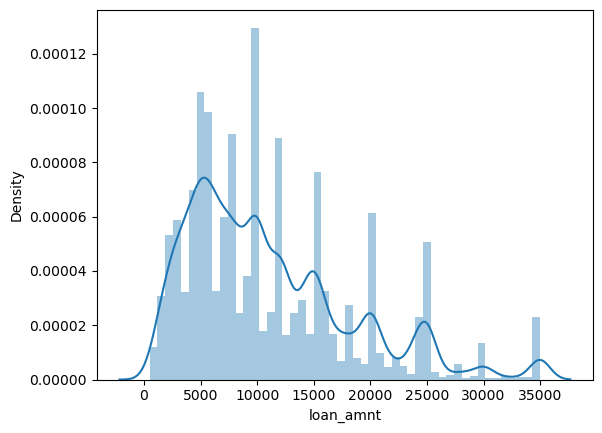

-------------------------- annual_inc ----------------------------


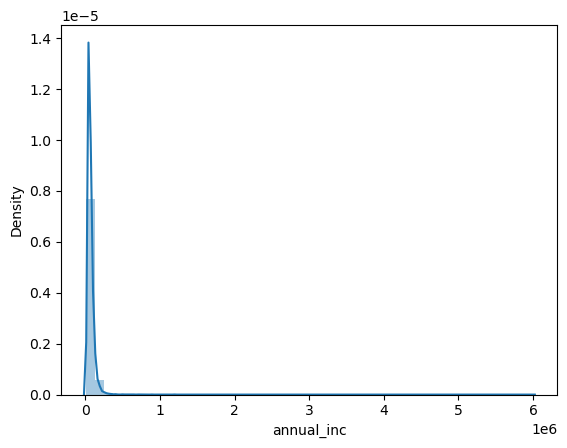

-------------------------- lta ----------------------------


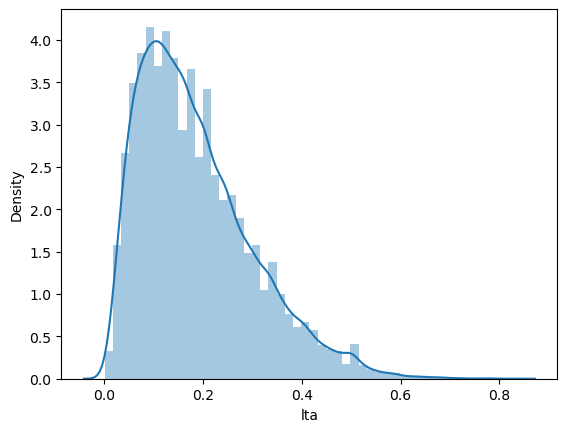

In [18]:
for i in num_cols:
    print('--------------------------',i,'----------------------------')
    sns.distplot(ln[i])
    pt.show()

-------------------------- grade ----------------------------


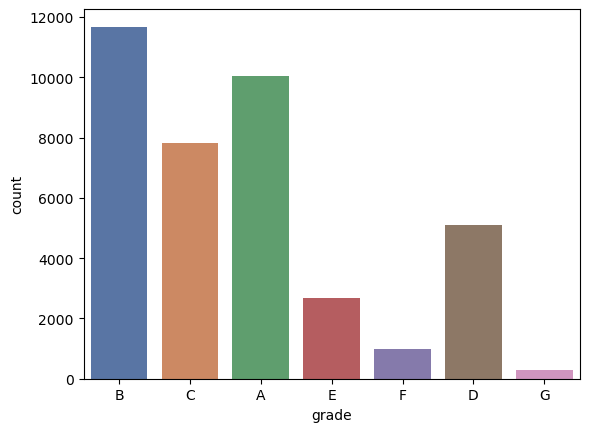

-------------------------- sub_grade ----------------------------


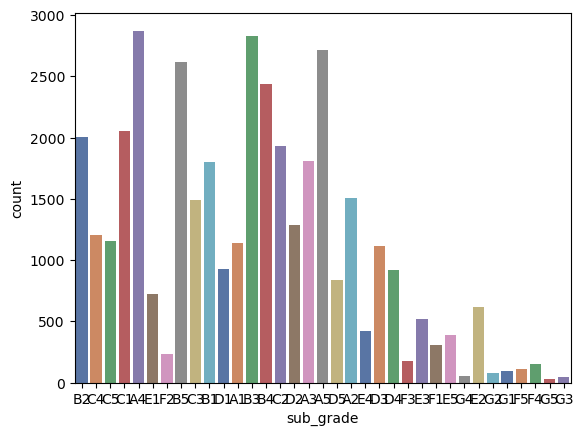

-------------------------- purpose ----------------------------


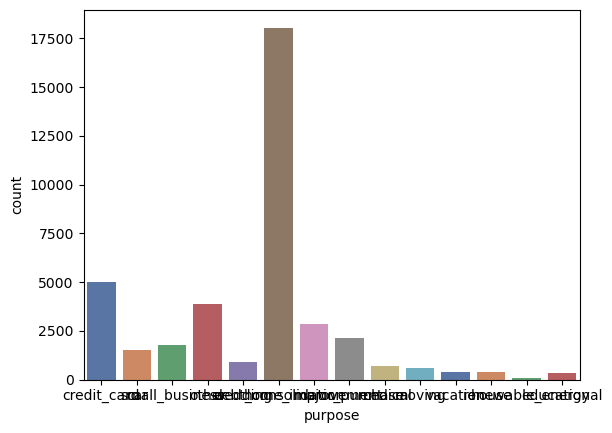

-------------------------- home_ownership ----------------------------


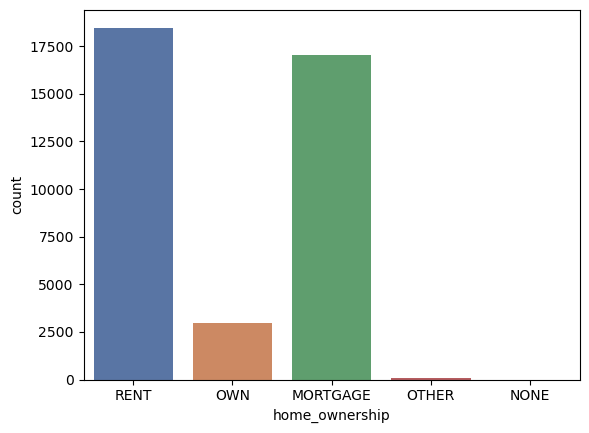

-------------------------- verification_status ----------------------------


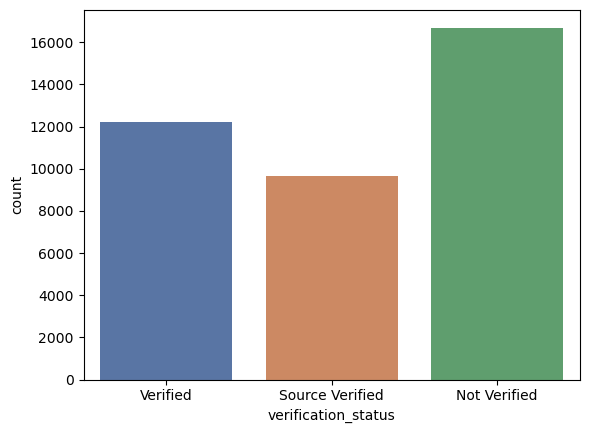

-------------------------- issue_d ----------------------------


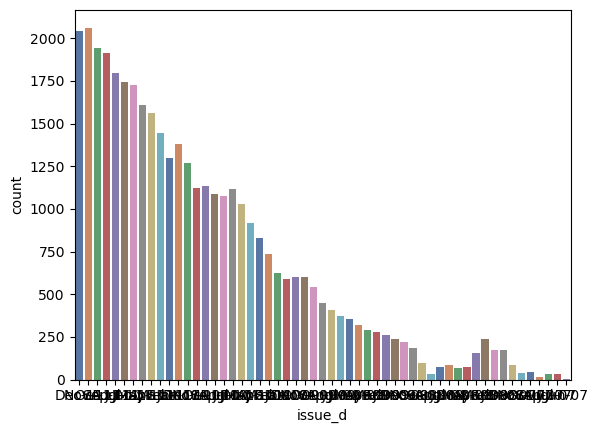

-------------------------- loan_status ----------------------------


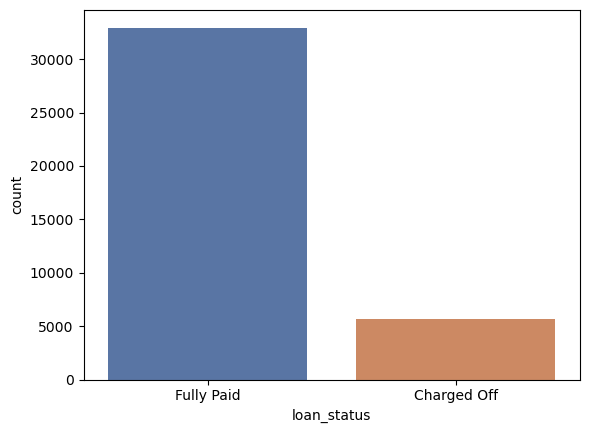

-------------------------- addr_state ----------------------------


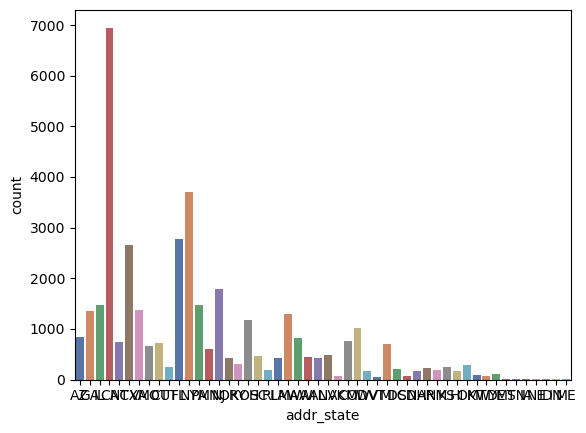

-------------------------- pub_rec_bankruptcies ----------------------------


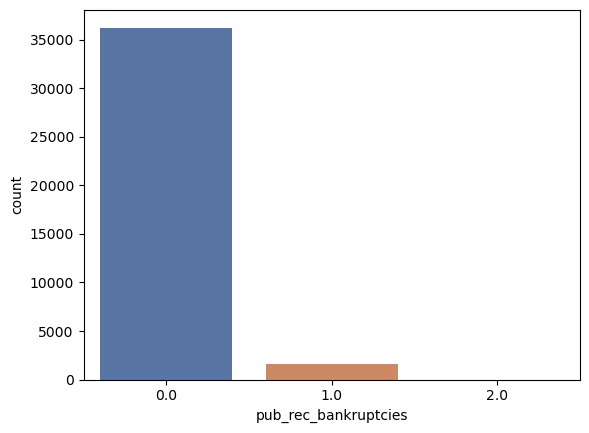

-------------------------- loan_amount ----------------------------


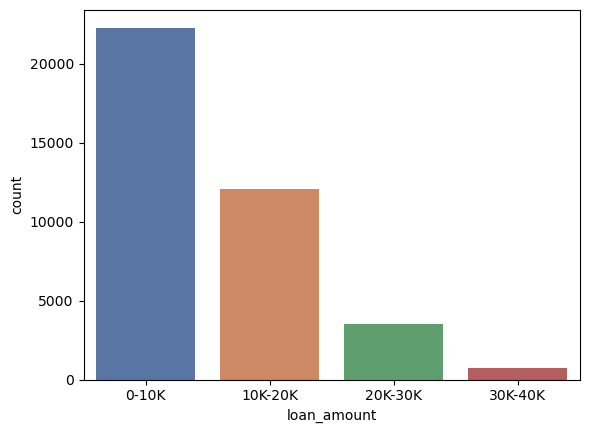

-------------------------- annual_income ----------------------------


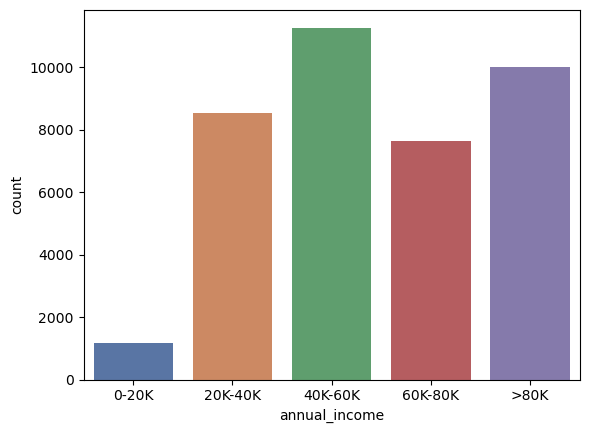

In [19]:
for i in cat_cols:
    print('--------------------------',i,'----------------------------')
    sns.countplot(x=ln[i],palette='deep')
    pt.show()

--------------loan status vs  int_rate  -----------------


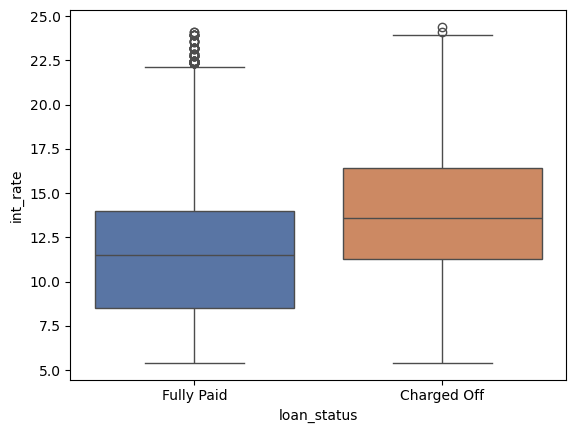

--------------loan status vs  term  -----------------


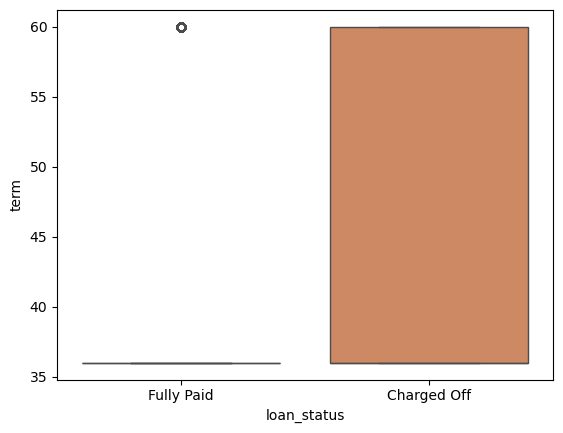

--------------loan status vs  installment  -----------------


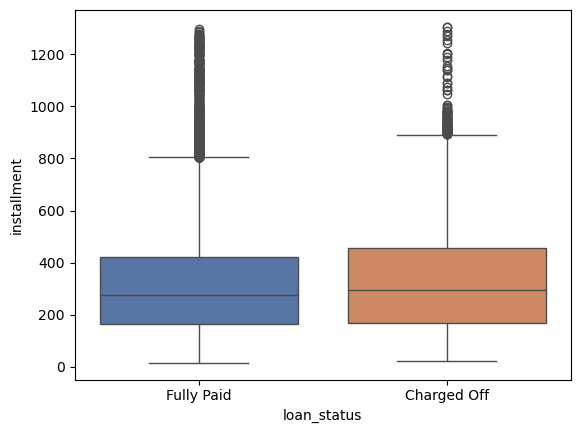

--------------loan status vs  dti  -----------------


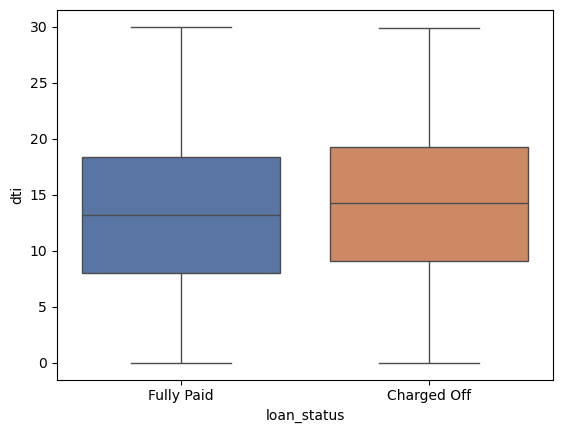

--------------loan status vs  open_acc  -----------------


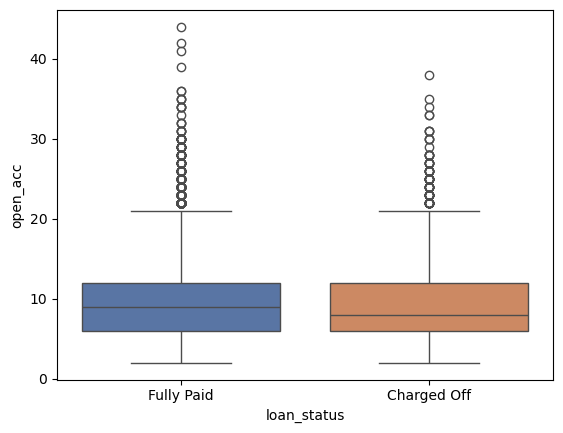

--------------loan status vs  revol_bal  -----------------


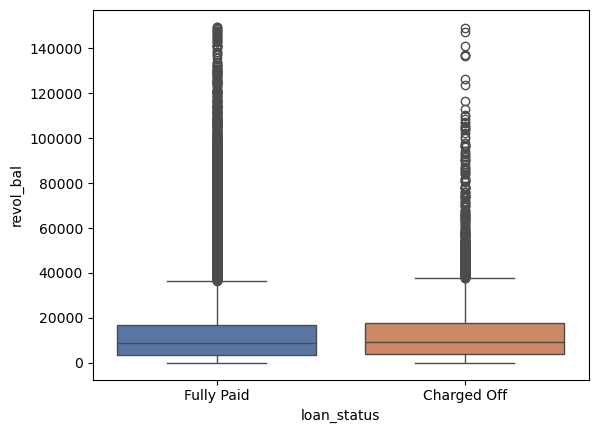

--------------loan status vs  total_rec_prncp  -----------------


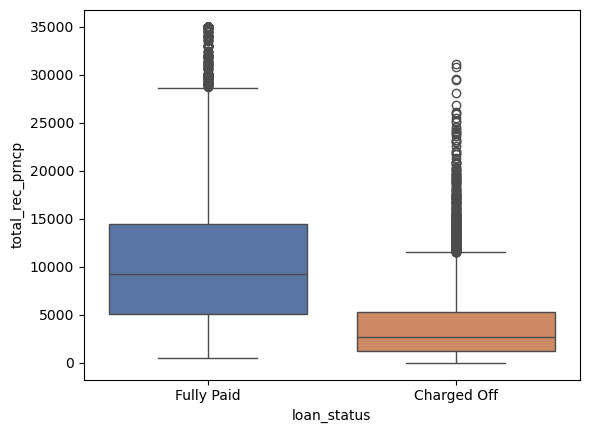

--------------loan status vs  total_rec_int  -----------------


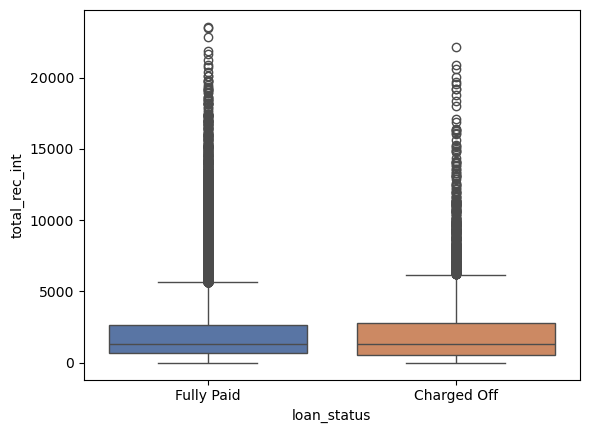

--------------loan status vs  total_rec_late_fee  -----------------


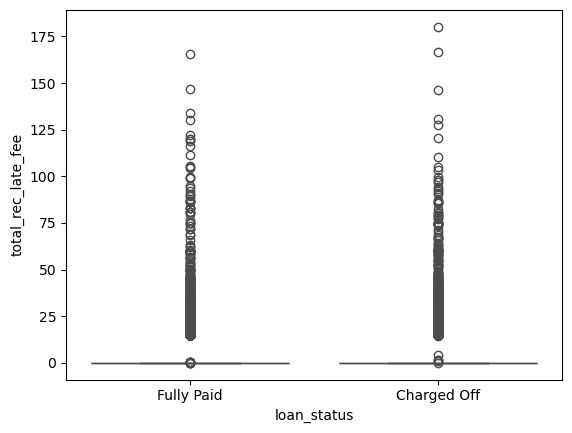

--------------loan status vs  delinq_2yrs  -----------------


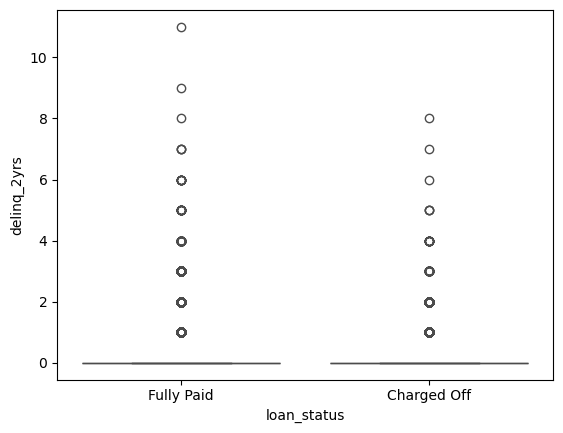

--------------loan status vs  mths_since_last_delinq  -----------------


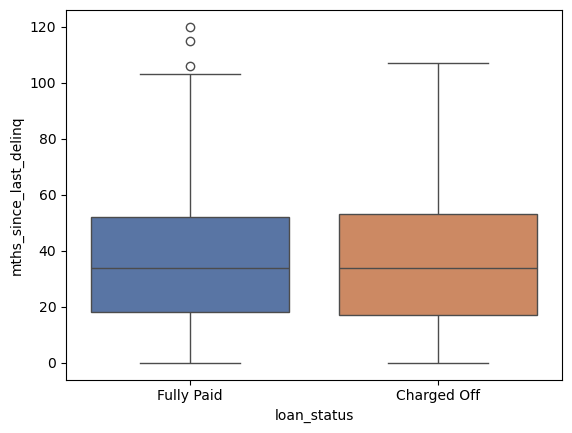

--------------loan status vs  Defaulted  -----------------


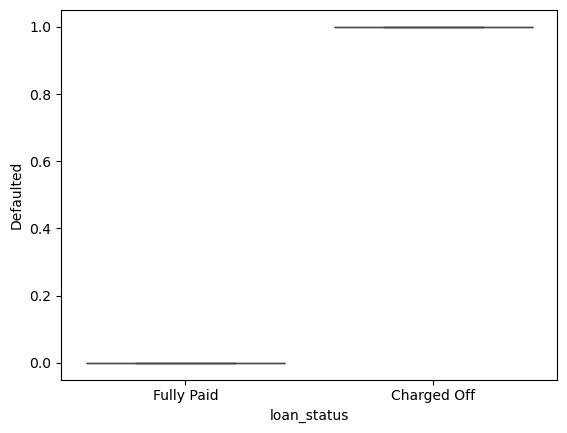

--------------loan status vs  loan_amnt  -----------------


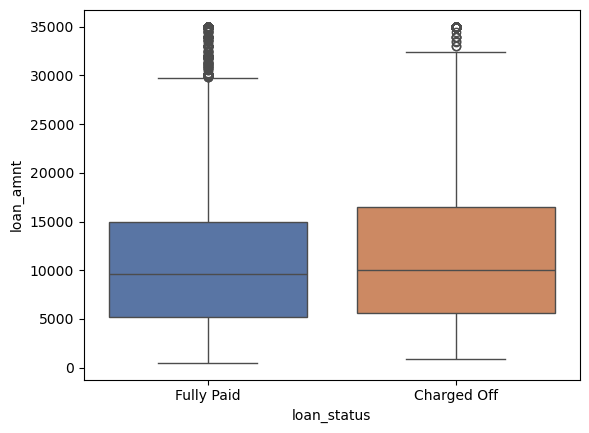

--------------loan status vs  annual_inc  -----------------


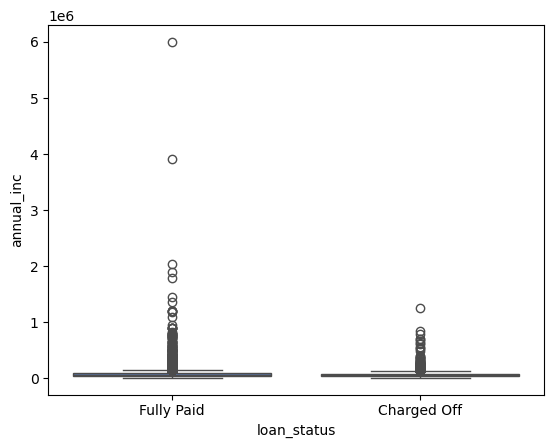

--------------loan status vs  lta  -----------------


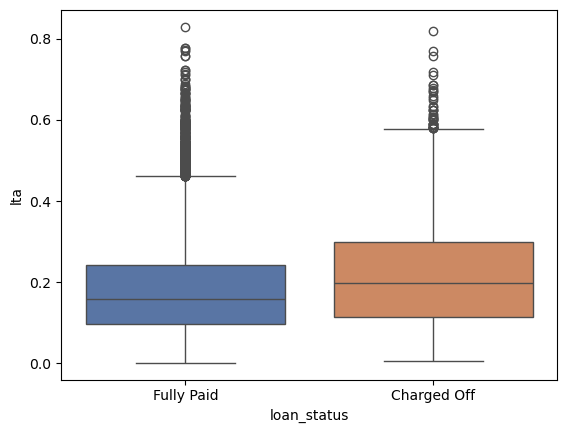

In [20]:
#numerical vs categorical
for i in num_cols:
    print("--------------loan status vs ",i," -----------------")
    sns.boxplot(x=ln['loan_status'],y=ln[i],palette='deep')
    pt.show()

--------------loan status vs  int_rate  -----------------


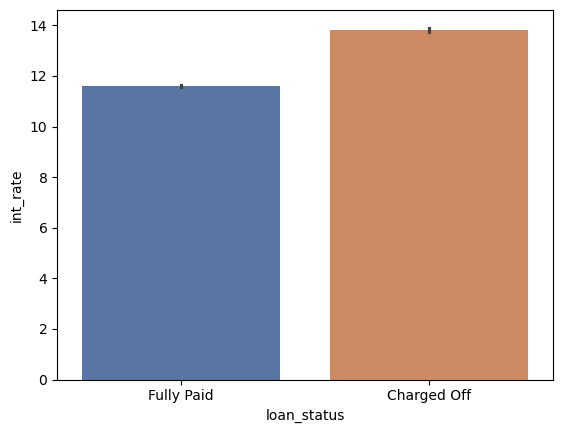

--------------loan status vs  term  -----------------


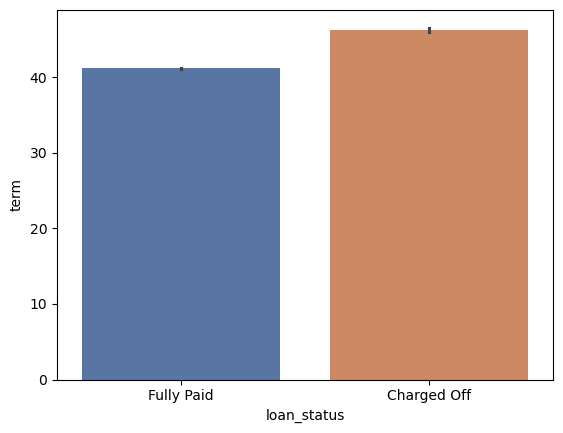

--------------loan status vs  installment  -----------------


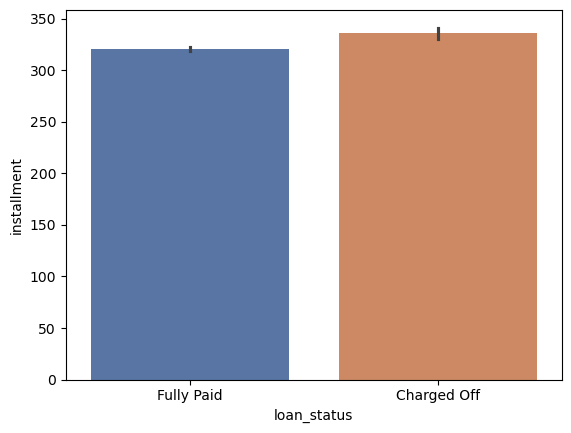

--------------loan status vs  dti  -----------------


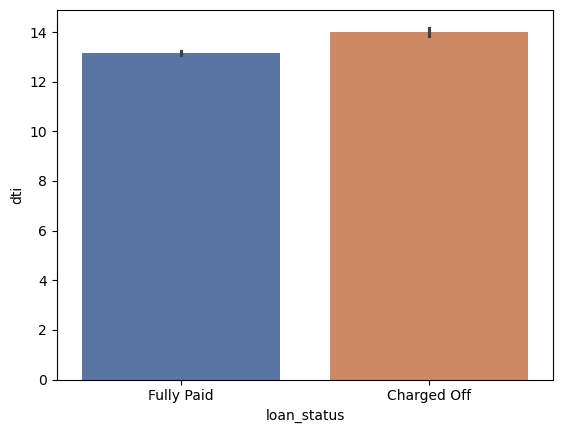

--------------loan status vs  open_acc  -----------------


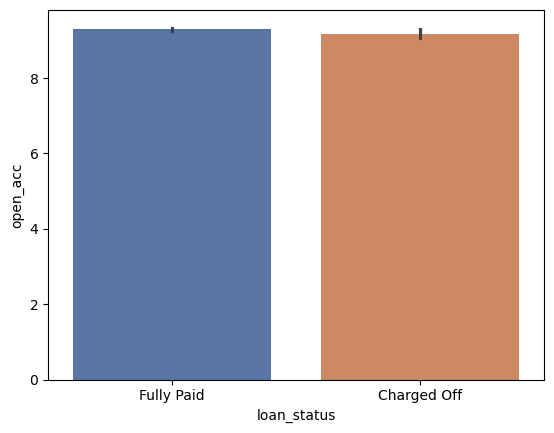

--------------loan status vs  revol_bal  -----------------


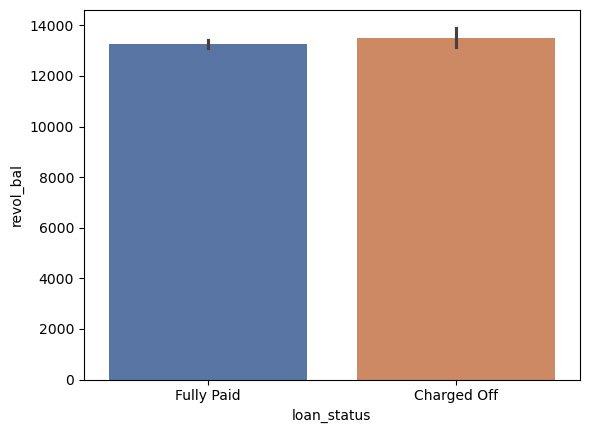

--------------loan status vs  total_rec_prncp  -----------------


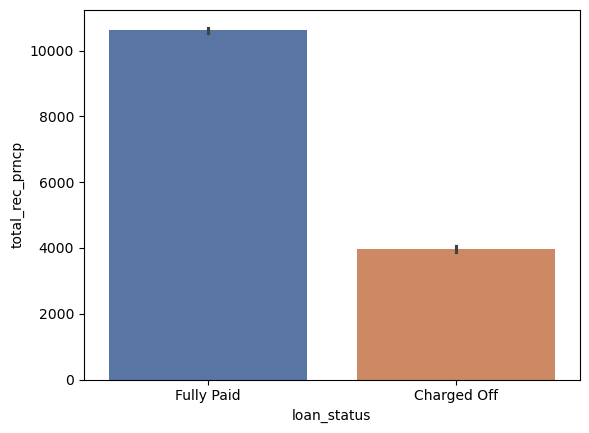

--------------loan status vs  total_rec_int  -----------------


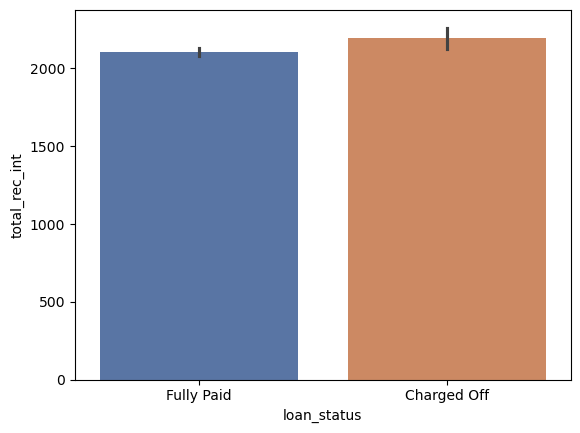

--------------loan status vs  total_rec_late_fee  -----------------


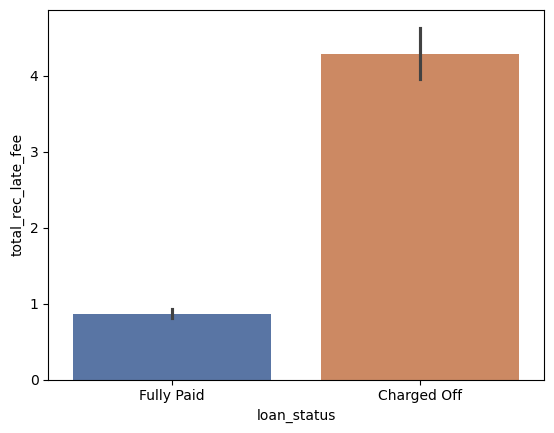

--------------loan status vs  delinq_2yrs  -----------------


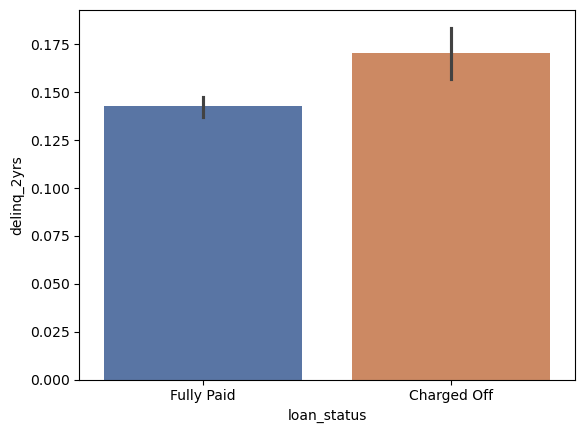

--------------loan status vs  mths_since_last_delinq  -----------------


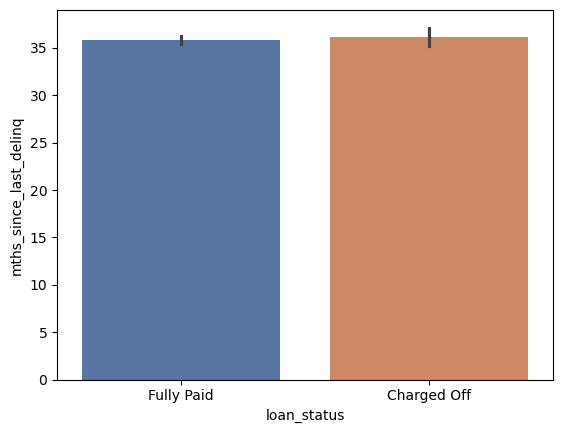

--------------loan status vs  Defaulted  -----------------


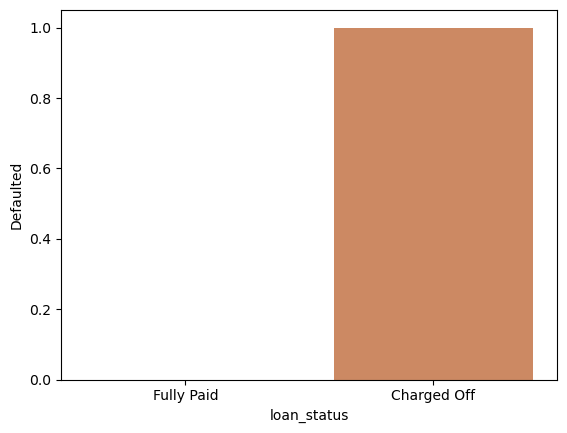

--------------loan status vs  loan_amnt  -----------------


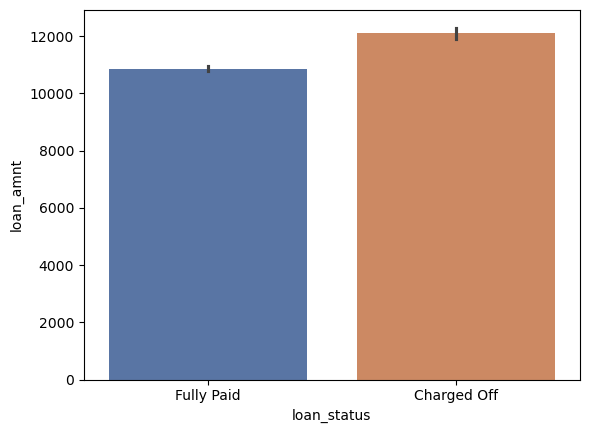

--------------loan status vs  annual_inc  -----------------


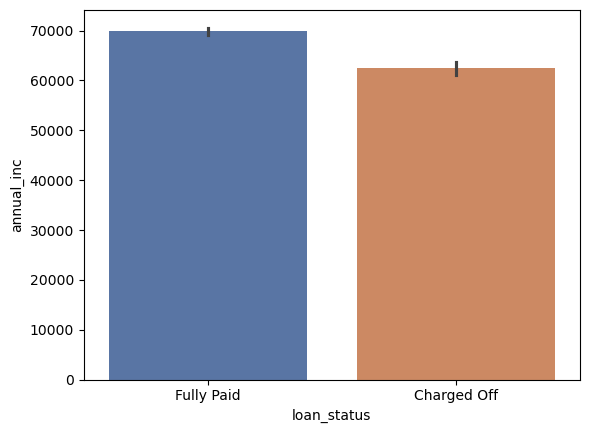

--------------loan status vs  lta  -----------------


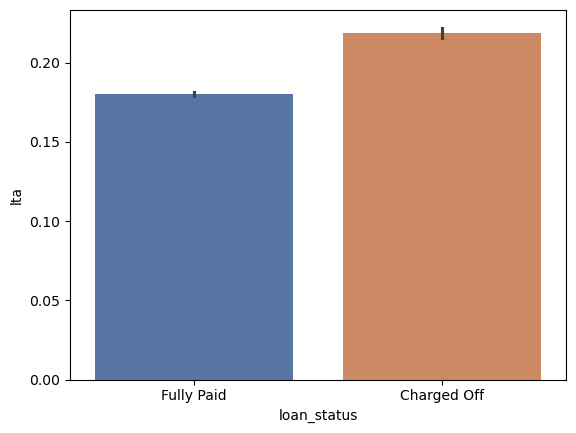

In [21]:
#numerical vs categorical
for i in num_cols:
    print("--------------loan status vs ",i," -----------------")
    sns.barplot(x=ln['loan_status'],y=ln[i],palette='deep')
    pt.show()

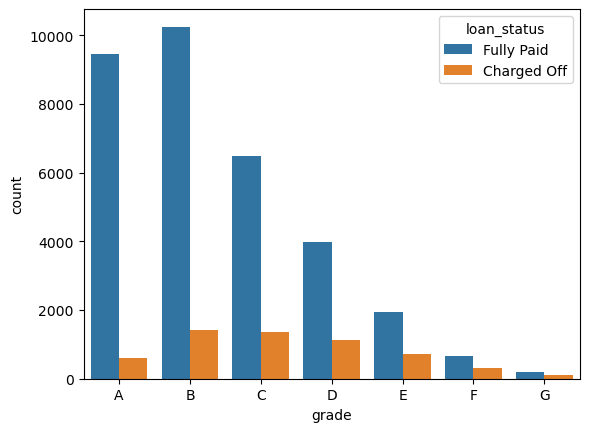

In [22]:
#Grade vs loan status
sns.countplot(hue='loan_status',x='grade',data=ln,order=['A','B','C','D','E','F','G'])
pt.show()

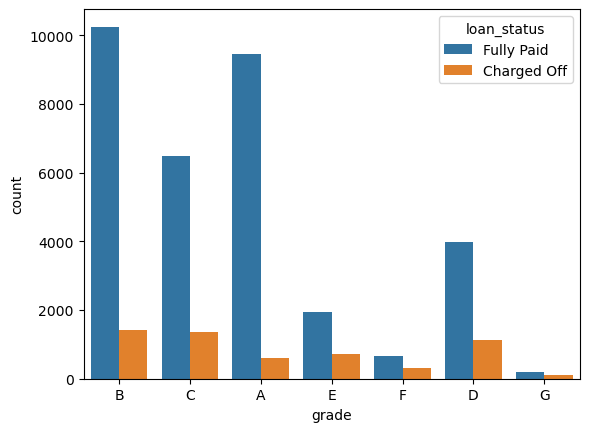

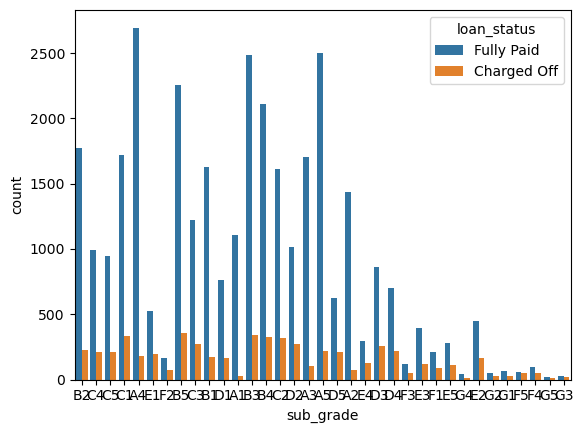

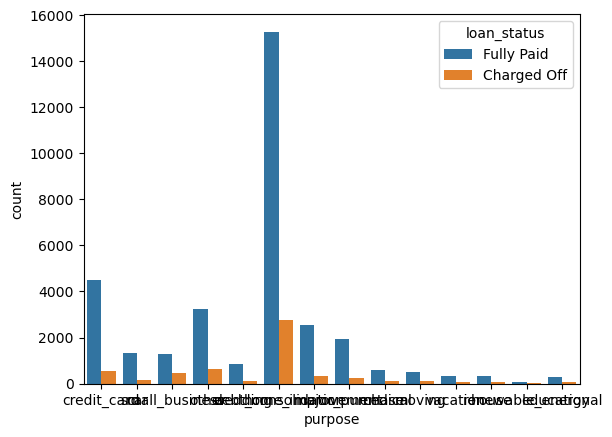

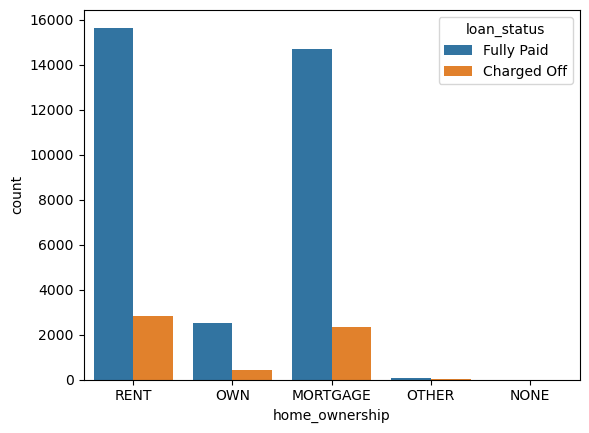

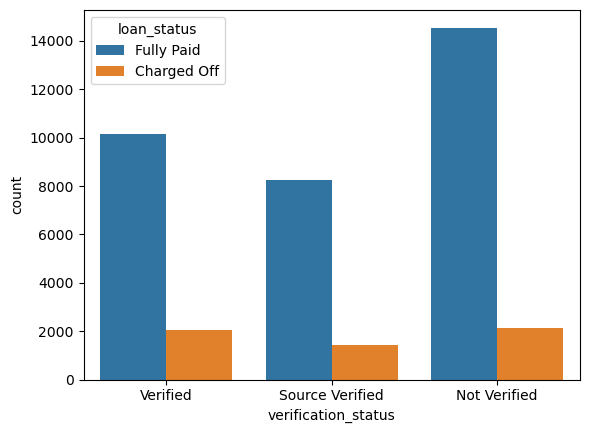

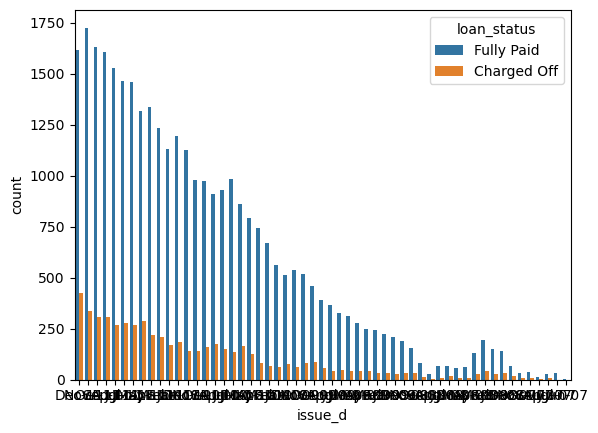

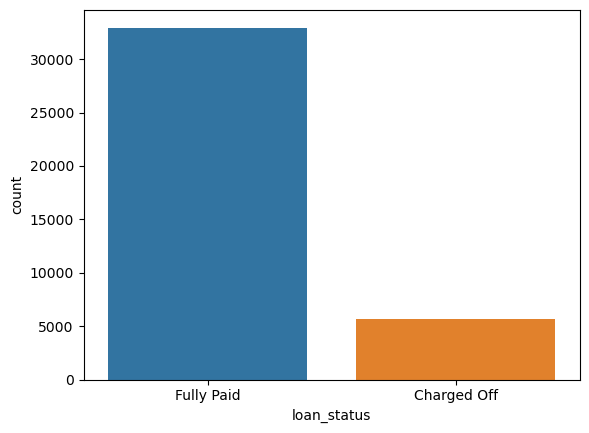

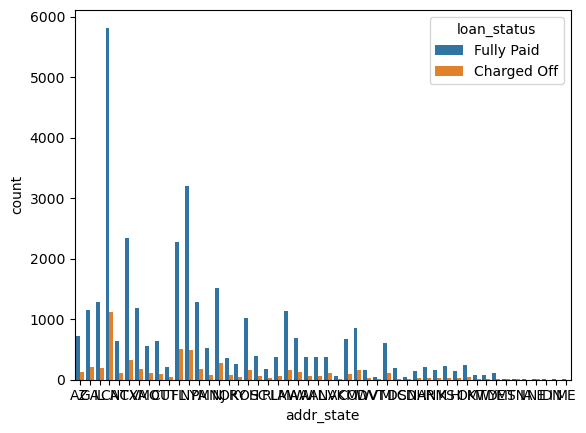

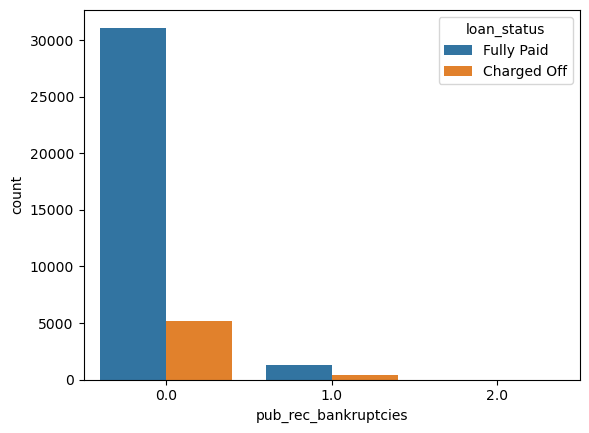

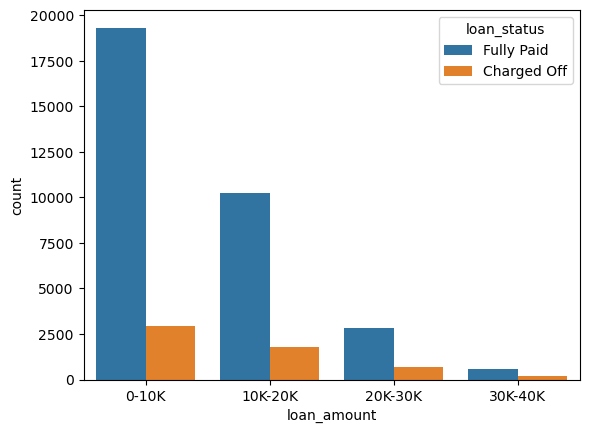

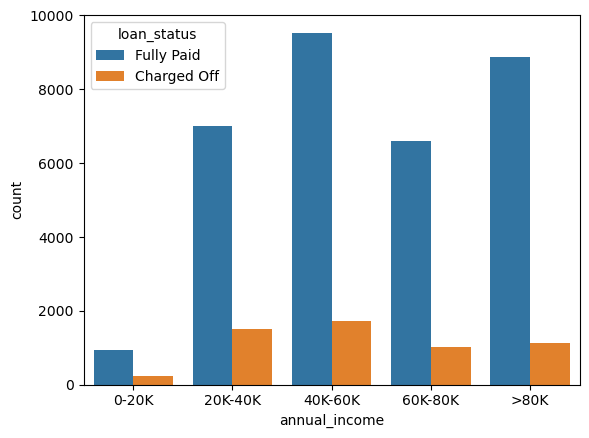

In [23]:
for i in cat_cols:
    sns.countplot(hue='loan_status',x=i,data=ln)
    pt.show()

In [24]:
# Calculate value counts as percentages
#value_counts_percentage = df1[['home_ownership','loan_status']].value_counts(normalize=True) * 100

# Create the countplot
#ax = sns.countplot(data=df, x='Category')
df1_a=ln[['home_ownership','loan_status']].value_counts().reset_index()
df1_b=ln['home_ownership'].value_counts().reset_index()

df1_a, df1_b
df3=df1_a.merge(df1_b,how='left',left_on='home_ownership',right_on='home_ownership').sort_values('home_ownership')

#df3.rename(columns={0:'sub_count'},inplace='True')
df3

,home_ownership,loan_status,count_x,count_y
1,MORTGAGE,Fully Paid,14694,17021
4,MORTGAGE,Charged Off,2327,17021
8,NONE,Fully Paid,3,3
6,OTHER,Fully Paid,80,98
7,OTHER,Charged Off,18,98
3,OWN,Fully Paid,2532,2975
5,OWN,Charged Off,443,2975
0,RENT,Fully Paid,15641,18480
2,RENT,Charged Off,2839,18480


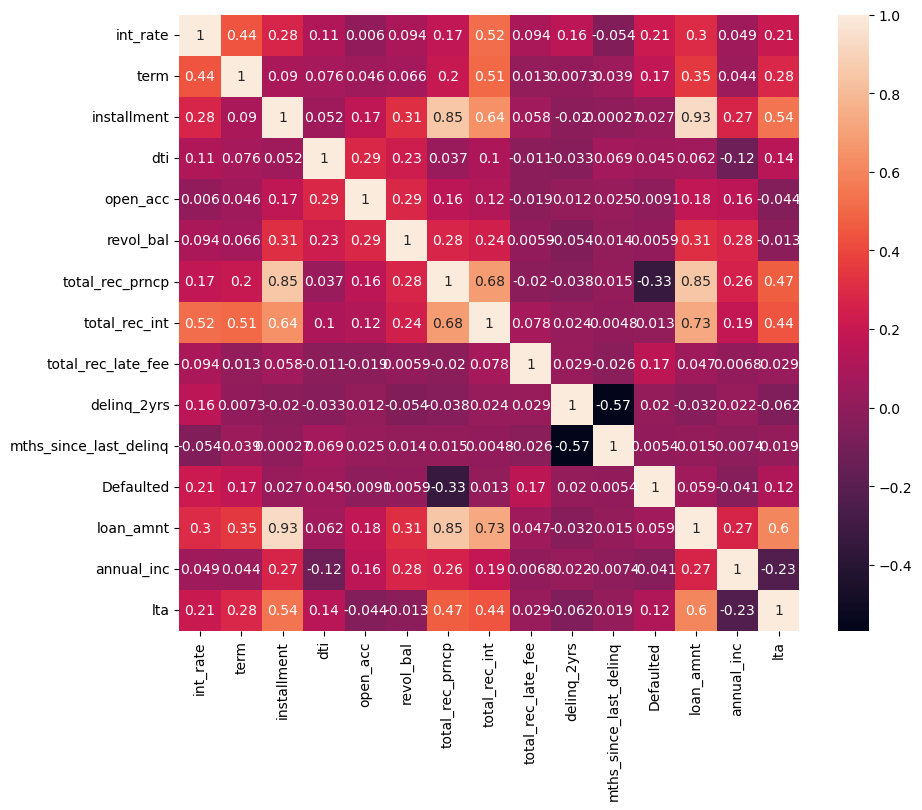

In [25]:
#Multivariate analysis
pt.figure(figsize=(10,8))
sns.heatmap(ln[num_cols].corr(),annot=True)
pt.show()